In [187]:
#Importar librerias
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

from sklearn.linear_model import LinearRegression
import seaborn as sns

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import scipy.stats as stats

In [189]:
#Cargar el dataset en un data frame
df = pd.read_csv('./Car details v3.csv')

In [191]:
#Exploración Inicial de los Datos
# Mostrar primeras filas del DataFrame
df.head(20)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [193]:
# Información sobre tipos de datos y valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [195]:
# Estadísticas descriptivas de variables numéricas
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


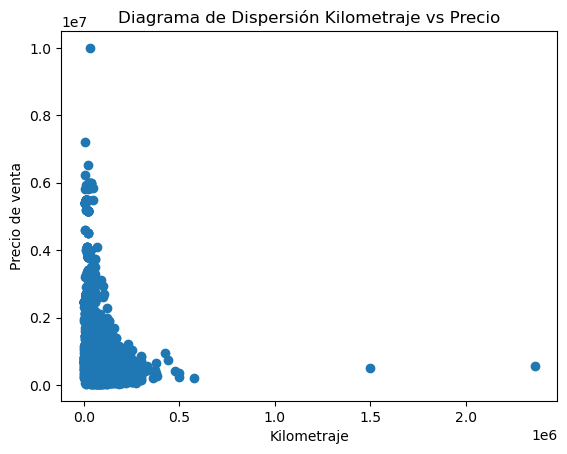

In [197]:
# Visualización de Datos Básica
# Diagrama de dispersión entre dos variables
plt.scatter(df['km_driven'], df['selling_price'])
plt.xlabel('Kilometraje')
plt.ylabel('Precio de venta')
plt.title('Diagrama de Dispersión Kilometraje vs Precio')
plt.show()


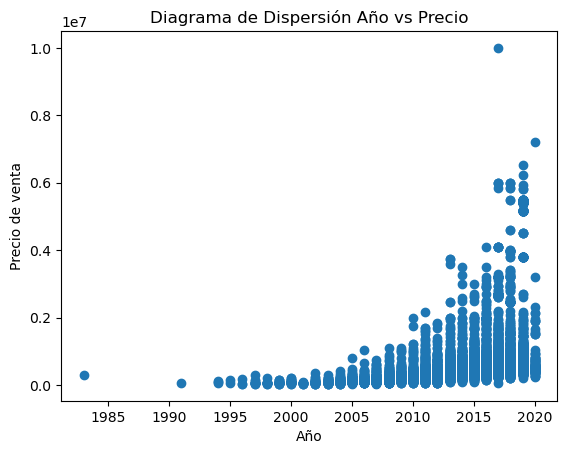

In [199]:
# Diagrama de dispersión entre dos variables
plt.scatter(df['year'], df['selling_price'])
plt.xlabel('Año')
plt.ylabel('Precio de venta')
plt.title('Diagrama de Dispersión Año vs Precio')
plt.show()

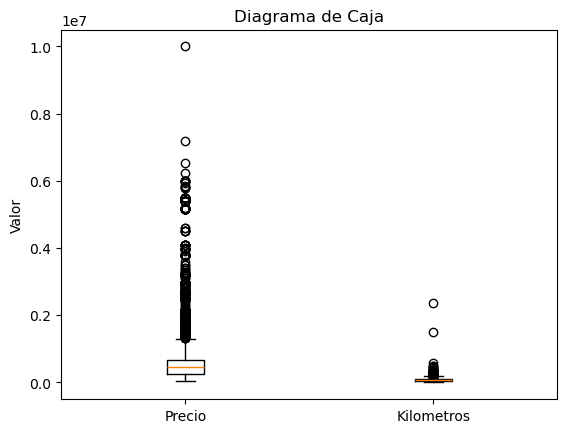

In [201]:
# Diagrama de caja para detectar valores atípicos
plt.boxplot([df['selling_price'], df['km_driven']], labels=['Precio', 'Kilometros'])
plt.ylabel('Valor')
plt.title('Diagrama de Caja')
plt.show()

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [203]:
# Manejo de Valores Faltantes y Duplicados
# Eliminar filas duplicadas
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
df.info()

1202
<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   year           6926 non-null   int64  
 2   selling_price  6926 non-null   int64  
 3   km_driven      6926 non-null   int64  
 4   fuel           6926 non-null   object 
 5   seller_type    6926 non-null   object 
 6   transmission   6926 non-null   object 
 7   owner          6926 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6721 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 757.5+ KB


In [205]:
# Verificar valores faltantes en el DataFrame
print(df.isna().sum())

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
torque           209
seats            208
dtype: int64


In [207]:
# Verificar la cantidad de registros con al menos un valor nulo
filas_con_nulos = df.isnull().any(axis=1).sum()
print(filas_con_nulos)

209


In [217]:
#Realizar una copia del df con valores eliminados 
# Calcular el porcentaje de datos a eliminar
porcentaje = (filas_con_nulos / df.shape[0]) * 100
print(f'El porcentaje de datos a eliminar por contar con algún valor nulo es: {porcentaje:.2f}%')

df_sin_nulos = df.dropna()
df_sin_nulos.info()

El porcentaje de datos a eliminar por contar con algún valor nulo es: 3.02%
<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   object 
 9   engine         6717 non-null   object 
 10  max_power      6717 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 734.7+ KB


In [219]:
# Inicio a imputar valores y a transformar para utilizar en el modelo de regresion

# La variable name contiene la marca y la serie de los vehiculos, pero hay 3 que en marca son dos palabras
# las reemplzo por una sola palabra

df_sin_nulos.loc[df_sin_nulos['name'] == 'Land Rover', 'name'] = 'Land_Rover'
df_sin_nulos.loc[df_sin_nulos['name'] == 'Maruti', 'name'] = 'Maruti_Suzuki'


In [221]:
# Preparar los datos para aplicar el modelo de regresión lineal
'''
Divido la columna name en dos (marca y linea)
Las columnas mileage, engine y max_power son valores compuestos por un número y unidad de medida, por lo cual
tomo solo los valores numpericos para los calculos.
'''
df_sin_nulos['marca'] = df_sin_nulos['name'].str.split().str[0]
df_sin_nulos['linea'] = df_sin_nulos['name'].str.split(n=1).str[1]
df_sin_nulos['consumo_kmpl'] = df_sin_nulos['mileage'].str.split().str[0]
df_sin_nulos['motor_cc'] = df_sin_nulos['engine'].str.split().str[0]
df_sin_nulos['max_power_bhp'] = df_sin_nulos['max_power'].str.split().str[0]

# Elimino las columnas originales y quedo con las nuevas que se acabaron de crear con los datos numpericos
df_sin_nulos = df_sin_nulos.drop(columns=['name', 'mileage','engine','max_power'])

C:\Users\GABRIEL\AppData\Local\Temp\ipykernel_43972\84383545.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos['marca'] = df_sin_nulos['name'].str.split().str[0]
C:\Users\GABRIEL\AppData\Local\Temp\ipykernel_43972\84383545.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos['linea'] = df_sin_nulos['name'].str.split(n=1).str[1]
C:\Users\GABRIEL\AppData\Local\Temp\ipykernel_43972\84383545.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [223]:
df_sin_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6717 non-null   int64  
 1   selling_price  6717 non-null   int64  
 2   km_driven      6717 non-null   int64  
 3   fuel           6717 non-null   object 
 4   seller_type    6717 non-null   object 
 5   transmission   6717 non-null   object 
 6   owner          6717 non-null   object 
 7   torque         6717 non-null   object 
 8   seats          6717 non-null   float64
 9   marca          6717 non-null   object 
 10  linea          6717 non-null   object 
 11  consumo_kmpl   6717 non-null   object 
 12  motor_cc       6717 non-null   object 
 13  max_power_bhp  6717 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 787.1+ KB


In [225]:
# Verifico valores atipicos de max_power_bhp para imputar datos

print(df_sin_nulos['max_power_bhp'].unique())


['74' '103.52' '78' '90' '88.2' '81.86' '57.5' '37' '67.1' '68.1' '108.45'
 '60' '73.9' '67' '82' '88.5' '46.3' '88.73' '64.1' '98.6' '88.8' '83.81'
 '83.1' '47.3' '73.8' '34.2' '35' '81.83' '40.3' '121.3' '138.03' '160.77'
 '117.3' '116.3' '83.14' '67.05' '168.5' '100' '120.7' '98.63' '175.56'
 '103.25' '171.5' '100.6' '174.33' '187.74' '170' '78.9' '88.76' '86.8'
 '108.495' '108.62' '93.7' '103.6' '98.59' '189' '67.04' '68.05' '58.2'
 '82.85' '81.80' '73' '120' '94.68' '160' '65' '155' '69.01' '126.32'
 '138.1' '83.8' '126.2' '98.96' '62.1' '86.7' '188' '214.56' '177' '280'
 '148.31' '254.79' '190' '177.46' '204' '141' '117.6' '241.4' '282' '150'
 '147.5' '108.5' '103.5' '183' '181.04' '157.7' '164.7' '91.1' '400' '68'
 '75' '85.8' '87.2' '53' '118' '103.2' '83' '84' '58.16' '147.94' '74.02'
 '53.3' '80' '88.7' '97.7' '121.36' '162' '140' '94' '100.57' '82.9'
 '83.11' '70' '153.86' '121' '126.3' '73.97' '171' '69' '99.6' '102' '105'
 '63' '79.4' '97.9' '63.1' '66.1' '110' '174.5' '53

In [256]:
df_sin_nulos.loc[df_sin_nulos['max_power_bhp'] == 'nan']
df_sin_nulos.drop(df_sin_nulos[df_sin_nulos['max_power_bhp'] == 'bhp'].index, inplace=True)

In [258]:
# Convertir las nuevas columnas a tipo numérico o string
#df_sin_nulos['owner'] = df_sin_nulos['owner'].astype('string')
df_sin_nulos['consumo_kmpl'] = df_sin_nulos['consumo_kmpl'].astype(float)
#df_sin_nulos['fuel'] = df_sin_nulos['fuel'].astype('string')
#df_sin_nulos['seller_type'] = df_sin_nulos['seller_type'].astype('string')
#df_sin_nulos['transmission'] = df_sin_nulos['transmission'].astype('string')
#df_sin_nulos['torque'] = df_sin_nulos['torque'].astype('string')
#df_sin_nulos['marca'] = df_sin_nulos['marca'].astype('string')
#df_sin_nulos['linea'] = df_sin_nulos['linea'].astype('string')
df_sin_nulos['motor_cc'] = df_sin_nulos['motor_cc'].astype(float)
df_sin_nulos['max_power_bhp'] = df_sin_nulos['max_power_bhp'].astype(float)
df_sin_nulos.info()
# Estadísticas descriptivas de variables numéricas
print(df_sin_nulos.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6717 non-null   int64  
 1   selling_price  6717 non-null   int64  
 2   km_driven      6717 non-null   int64  
 3   fuel           6717 non-null   string 
 4   seller_type    6717 non-null   string 
 5   transmission   6717 non-null   string 
 6   owner          6717 non-null   string 
 7   torque         6717 non-null   string 
 8   seats          6717 non-null   float64
 9   marca          6717 non-null   string 
 10  linea          6717 non-null   string 
 11  consumo_kmpl   6717 non-null   float64
 12  motor_cc       6717 non-null   float64
 13  max_power_bhp  6717 non-null   float64
dtypes: float64(4), int64(3), string(7)
memory usage: 787.1 KB
              year  selling_price     km_driven        seats  consumo_kmpl  \
count  6717.000000   6.717000e+03  6.717000e+03  6717

## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

En este caso de estudio, la variable selling_price define el valor del vehículo, por lo cual es la variable dependiente.
Las demás variables (12) aportan información valiosa para el entrenamiento, sin embargo, como el modelo de regresión lineal solo acepta valores numéricos se deben ajustar las variables categóricas como dummies y de esta forma obtener mejores resultados en el modelo

In [231]:
# Convertir las variables categóricas en variables dummy para el entrenamiento
df_dummies = pd.get_dummies(df_sin_nulos, columns=['marca', 'linea', 'transmission','fuel','seller_type','owner','torque'], drop_first=True)
# Verifico la creacion de las columnas dummies
df_dummies

,year,selling_price,km_driven,seats,consumo_kmpl,motor_cc,max_power_bhp,marca_Ashok,marca_Audi,marca_BMW,...,torque_96.1Nm@ 3000rpm,torque_96Nm@ 2500rpm,torque_96Nm@ 3000rpm,torque_96Nm@ 3500rpm,torque_98Nm@ 1600-3000rpm,torque_99.04Nm@ 4500rpm,torque_99.07Nm@ 4500rpm,torque_99.1Nm@ 4500rpm,torque_99.8Nm@ 2700rpm,torque_99Nm@ 4500rpm
0,2014,450000,145500,5.0,23.40,1248.0,74.00,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2014,370000,120000,5.0,21.14,1498.0,103.52,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2006,158000,140000,5.0,17.70,1497.0,78.00,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2010,225000,127000,5.0,23.00,1396.0,90.00,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2007,130000,120000,5.0,16.10,1298.0,88.20,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,2013,260000,50000,5.0,18.90,998.0,67.10,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8122,2014,475000,80000,5.0,22.54,1396.0,88.73,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8123,2013,320000,110000,5.0,18.50,1197.0,82.85,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8124,2007,135000,119000,5.0,16.80,1493.0,110.00,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [233]:
df_sin_nulos['selling_price'].value_counts()

selling_price
300000    208
350000    196
600000    167
400000    164
250000    161
         ... 
426000      1
358000      1
348000      1
978999      1
746000      1
Name: count, Length: 670, dtype: int64

## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

## Modelo 1
Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

In [235]:
# Se crean variables X y Y para almacenar la información del entrenamiento

X = df_dummies.drop('selling_price',axis=1) # Se cargan los datos de train sin los datos de la columna selling_price 
Y = df_dummies['selling_price'] # Se cargan los datos de train con los datos de la la columna selling_price

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state= 0)

In [237]:
print (X_train)

      year  km_driven  seats  consumo_kmpl  motor_cc  max_power_bhp  \
2861  2006     120000    5.0         13.10    1795.0         127.00   
5292  2019      10000    5.0         28.40    1248.0          74.02   
4141  2012      80000    5.0         20.50    1598.0         103.50   
3374  2017      15000    5.0         24.70     796.0          47.30   
6797  2008      80000    5.0         19.70     796.0          46.30   
...    ...        ...    ...           ...       ...            ...   
5865  2011      70000    5.0         17.50    1298.0          85.80   
3748  2011     148000    5.0         21.12    1248.0          88.80   
1889  2006     120000    5.0         19.70     796.0          46.30   
2946  2018      35000    5.0         23.84    1199.0          84.00   
3076  2018      25000    5.0         22.00    1197.0          81.80   

      marca_Ashok  marca_Audi  marca_BMW  marca_Chevrolet  ...  \
2861        False       False      False            False  ...   
5292        Fal

In [239]:
print (Y_train)

2861    140000
5292    754000
4141    290000
3374    310000
6797     95000
         ...  
5865    275000
3748    149000
1889    120000
2946    409999
3076    560000
Name: selling_price, Length: 5037, dtype: int64


## 5. Entrenamiento del modelo de Regresión Lineal

In [241]:
# Entrenar el modelo configurando los diferentes hiperparámetros

# Construir el modelo de regresión lineal 

modelo = LinearRegression() 

modelo.fit (X_train , Y_train)   

# Crea el modelo de prediccion
prediccion = modelo.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [242]:
print (Y_test)

5162    350000
3707    180000
2146    330000
2955    486000
5387    375000
         ...  
1740    650000
367     140000
5048    483000
3072    470000
6208    390000
Name: selling_price, Length: 1680, dtype: int64


In [243]:
print (prediccion)

[397440.37599635 196904.31507441 386527.30038532 ... 462317.14647477
 476915.05538141 250250.10232678]


## 6 Evaluación del modelo de regresion creado

In [247]:
# Evaluar el desempeño del modelo
# Calcular las métricas de evaluación

r2 = r2_score(Y_test, prediccion) # Coeficiente de determinación R²
mae = mean_absolute_error(Y_test, prediccion)  # Error Absoluto Medio
mse = mean_squared_error(Y_test, prediccion)   # Error Cuadrático Medio
rmse = np.sqrt(mse)                         # Raíz del Error Cuadrático Medio

# Imprimir las métricas
print(f'R² (Coeficiente de determinación): {r2}')
print(f'Error Absoluto Medio (MAE): {mae}')

R² (Coeficiente de determinación): 0.8056910413985119
Error Absoluto Medio (MAE): 100586.22725842641


## Modelo 2
Porcentaje de datos para entrenamiento (train) = 77% , y para prueba (test) = 23%

In [249]:
# Se crean variables X y Y para almacenar la información del entrenamiento

X = df_dummies.drop('selling_price',axis=1) # Se cargan los datos de train sin los datos de la columna selling_price 
Y = df_dummies['selling_price'] # Se cargan los datos de train con los datos de la la columna selling_price

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size=0.23, random_state= 0)

# Entrenar el modelo configurando los diferentes hiperparámetros

# Construir el modelo de regresión lineal 

modelo2 = LinearRegression() 

modelo2.fit (X_train2 , Y_train2)   

# Crea el modelo de prediccion
prediccion2 = modelo2.predict(X_test2) # la función predict predice los valores a partir del conjunto de datos de validación

# Evaluar el desempeño del modelo
# Calcular las métricas de evaluación

r2 = r2_score(Y_test2, prediccion2) # Coeficiente de determinación R²
mae = mean_absolute_error(Y_test2, prediccion2)  # Error Absoluto Medio
mse = mean_squared_error(Y_test2, prediccion2)   # Error Cuadrático Medio
rmse = np.sqrt(mse)                         # Raíz del Error Cuadrático Medio

# Imprimir las métricas
print(f'R² (Coeficiente de determinación): {r2}')
print(f'Error Absoluto Medio (MAE): {mae}')

R² (Coeficiente de determinación): 0.803015091563047
Error Absoluto Medio (MAE): 101455.53823681154


## Modelo 3
Porcentaje de datos para entrenamiento (train) = 80% , y para prueba (test) = 20%

In [251]:
# Se crean variables X y Y para almacenar la información del entrenamiento

X = df_dummies.drop('selling_price',axis=1) # Se cargan los datos de train sin los datos de la columna selling_price 
Y = df_dummies['selling_price'] # Se cargan los datos de train con los datos de la la columna selling_price

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X, Y, test_size=0.20, random_state= 0)

# Entrenar el modelo configurando los diferentes hiperparámetros

# Construir el modelo de regresión lineal 

modelo3 = LinearRegression() 

modelo3.fit (X_train3 , Y_train3)   

# Crea el modelo de prediccion
prediccion3 = modelo3.predict(X_test3) # la función predict predice los valores a partir del conjunto de datos de validación

# Evaluar el desempeño del modelo
# Calcular las métricas de evaluación

r2 = r2_score(Y_test3, prediccion3) # Coeficiente de determinación R²
mae = mean_absolute_error(Y_test3, prediccion3)  # Error Absoluto Medio
mse = mean_squared_error(Y_test3, prediccion3)   # Error Cuadrático Medio
rmse = np.sqrt(mse)                         # Raíz del Error Cuadrático Medio

# Imprimir las métricas
print(f'R² (Coeficiente de determinación): {r2}')
print(f'Error Absoluto Medio (MAE): {mae}')



R² (Coeficiente de determinación): 0.8487805671958621
Error Absoluto Medio (MAE): 91296.34349002852


## 7 Graficas del modelo

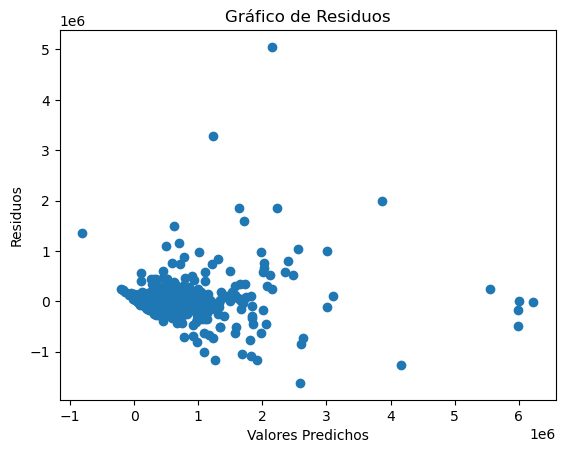

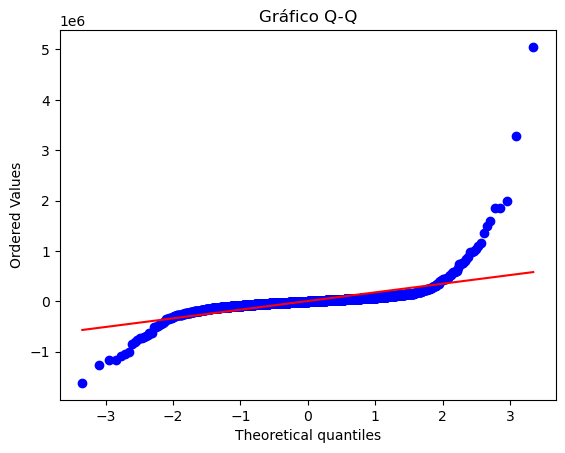

In [254]:
# Gráfico de Residuos
residuos = Y_test - prediccion
plt.scatter(prediccion, residuos)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.show()

# Gráfico Q-Q
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Gráfico Q-Q')
plt.show()